# Introduction

This notebook demonstrates how to use reinforcement learning to aid in forming a delta-neutral portfolio. The model used here is a neural network from the `PyTorch` Python package. This first cell creates the model, sets some random seeds to ensure reproducibility, and sets the device as the CPU or GPU. To view the implementation of this model, see the `aihedging` library files in the Explorer panel.

In [4]:
from aihedging.model import AIDeltaHedgeModel

qb = QuantBook()
model = AIDeltaHedgeModel(
    qb, timedelta(qb.get_parameter('min_contract_duration', 30)),
    timedelta(qb.get_parameter('max_contract_duration', 120)),
    timedelta(qb.get_parameter('min_holding_period', 14))
)

# Train the Base Model

This next cell generates some training data by using the Black–Scholes pricing equation. It runs 1,000 epochs to train the neural network to output the same Delta values as derived from differentiating the Black–Scholes formula. When the training is done, it plots the in-sample and out-of-sample loss values for each epoch.

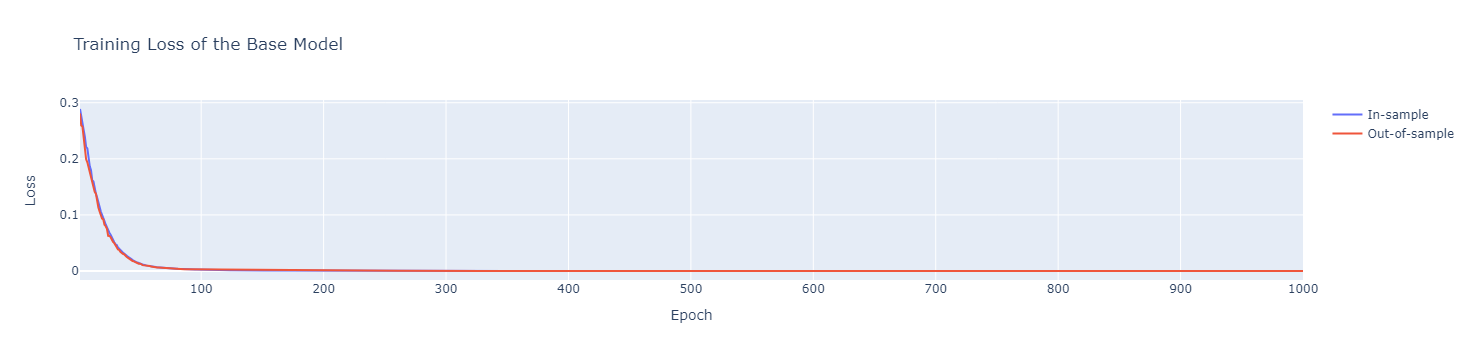

In [5]:
model.train_base_model(plot=True, epochs=1000)

# Tailor the Model to an Asset

This next cell continues to train the network, but uses real data for a specific underlying Equity. In this case, it's using AAPL as the underlying Equity. It runs 40 epochs and then plots how the loss generally decreases for each successive epoch. The decrease in loss shows that more training leads to more accurate in-sample predictions.

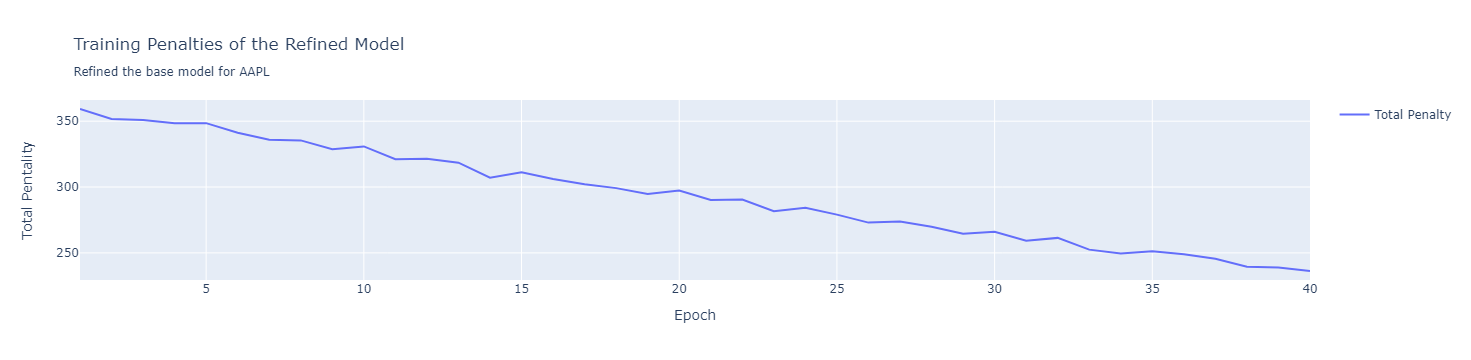

In [6]:
start_date = datetime(2023, 12, 19)
end_date = datetime(2024, 2, 17)
model.train_asset_model(
    "AAPL", start_date, end_date, epochs=40, save=False, in_research_env=True
)

# Test the Model

This final cell plots some performance metrics for a specific contract.

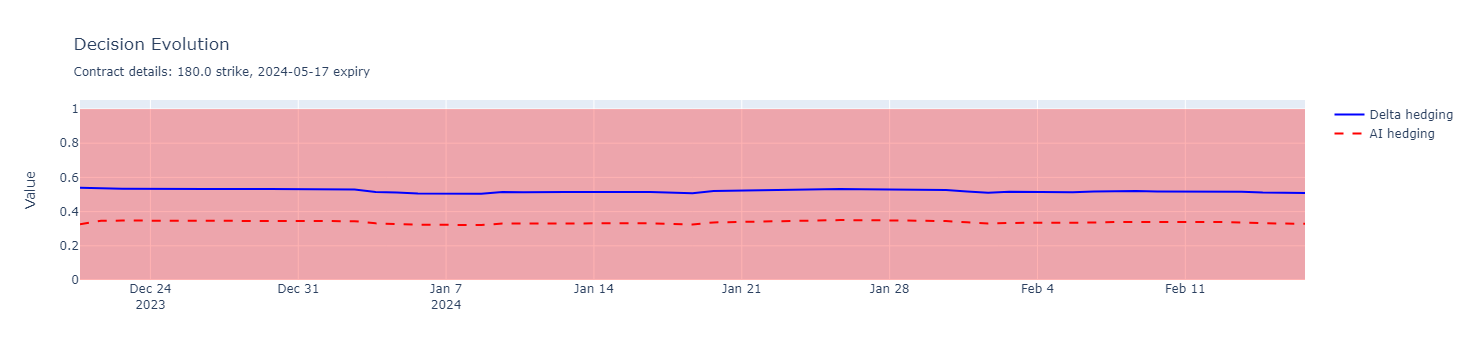

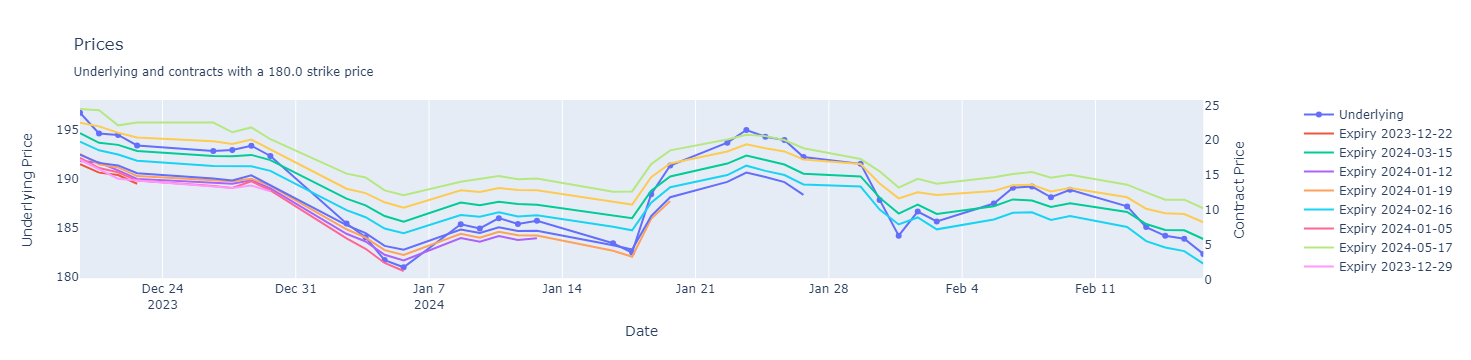

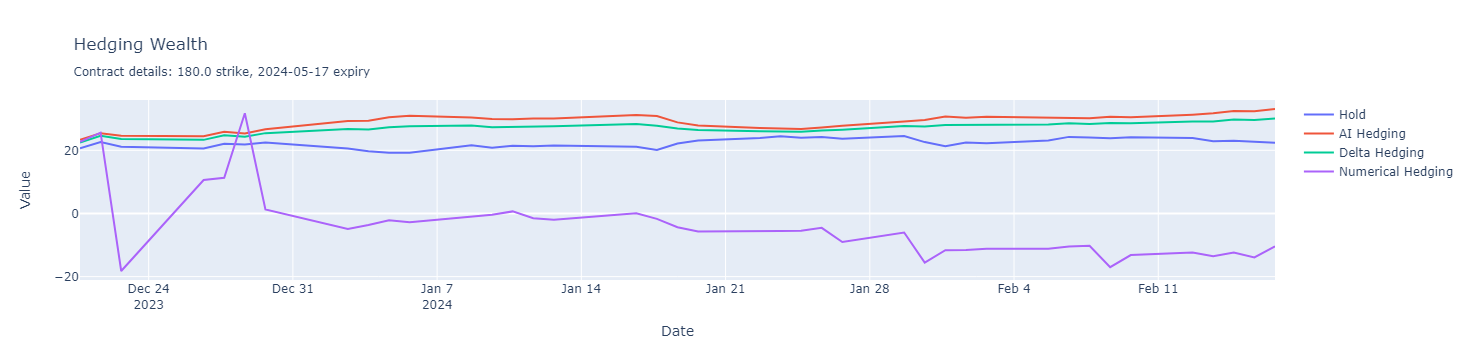

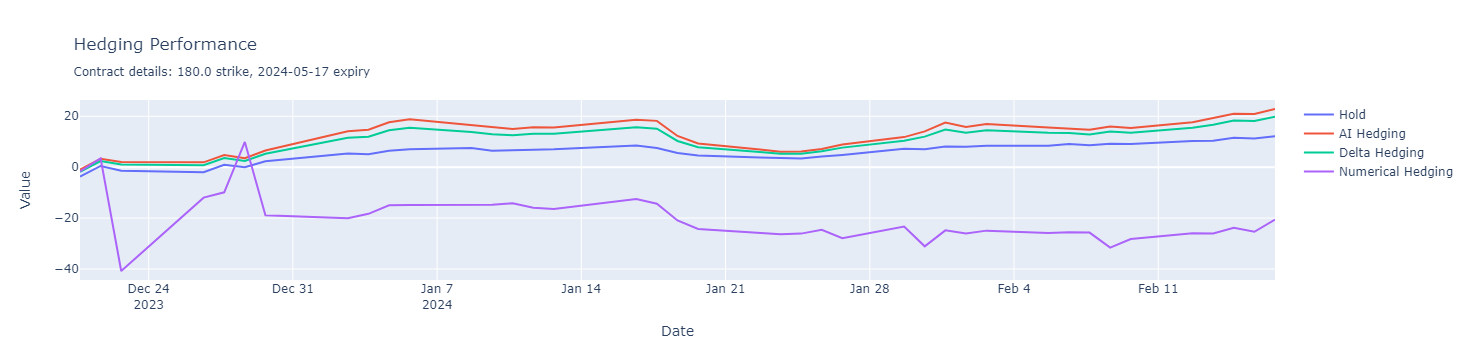

In [7]:
model.research_test(strike_level=-1, start=start_date, end=end_date)